# Modelos de minería de datos

In [1]:
# Importar las bibliotecas generales necesarias para el modelo:

import pandas as pd
import pandas_datareader.data as pdr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy as sp
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype

## 1 - Regresión lineal. 

La regresión lineal es un algoritmo de regresión típico que es responsable de la predicción numérica. Es distinto a los modelos de clasificación, como el árbol de decisiones, la máquina de vectores de soporte o la red neuronal. En pocas palabras, una regresión lineal encuentra la relación lineal óptima entre las variables independientes y las variables dependientes y luego realiza la predicción en consecuencia.

### Obtener los datos:

Se utilizará el dataset de gastos de seguros

In [92]:
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [82]:
df.shape

(1338, 7)

In [83]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


## Análisis exploratorio de los datos

Se analizan los datos a nivel descriptivo para familiarizarse con ellos.

In [84]:
df.describe() # Muestra estadística descriptiva de las variables numéricas

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


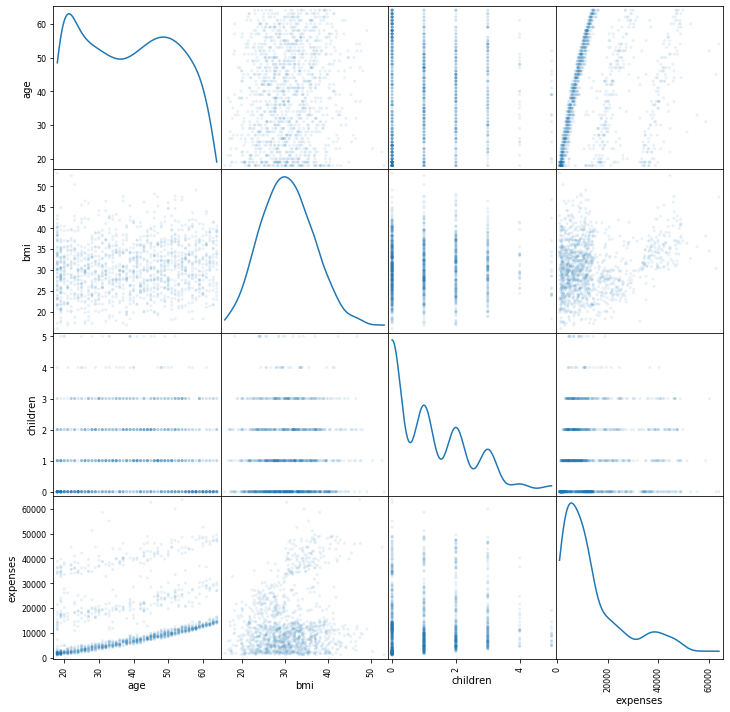

In [85]:
from pandas.plotting import scatter_matrix
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(df, diagonal = 'kde', alpha = 0.1, figsize = (12, 12))

# Show the plot
plt.show()

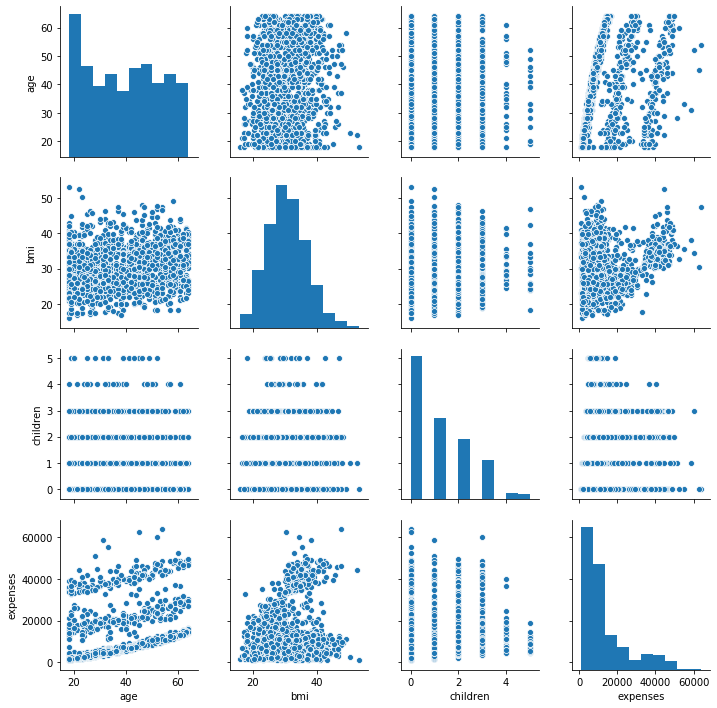

In [86]:
sns.pairplot(df)

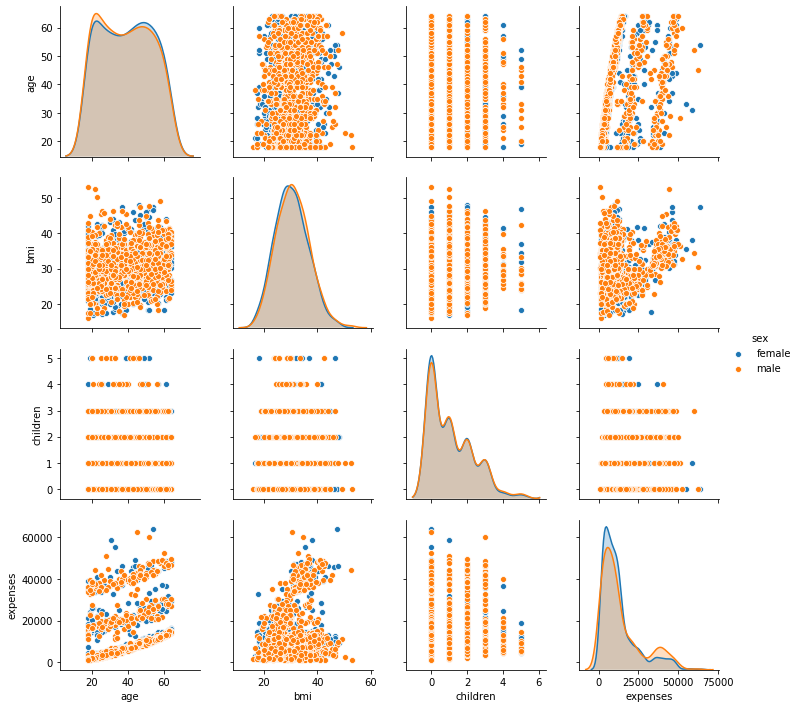

In [18]:
sns.pairplot(df, hue = 'sex')

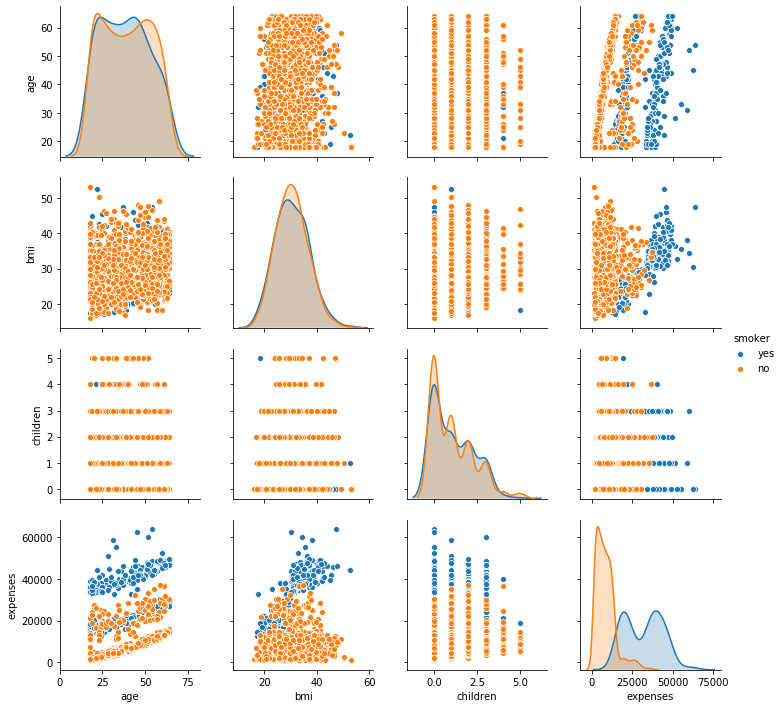

In [15]:
sns.pairplot(df, hue = 'smoker')

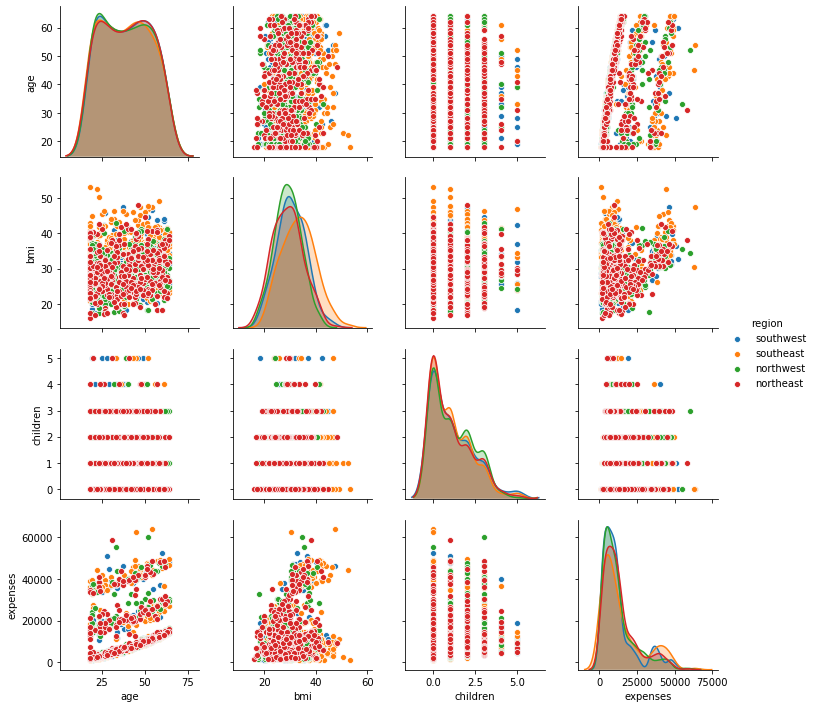

In [17]:
sns.pairplot(df, hue = 'region')

## Transformación de características (feature engineering):

**Transformación logarítmica:**

Hemos descubierto que la variable objetivo - "gastos" está sesgada a la derecha y sigue una distribución de ley de potencia. Dado que la regresión lineal asume una relación lineal entre la variable de entrada y salida, es necesario utilizar la transformación logarítmica a la variable de "gastos". Como se muestra a continuación, los datos tienden a distribuirse de manera más normal después de aplicar np.log2 ().

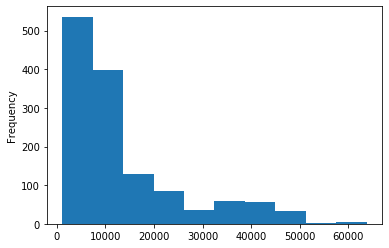

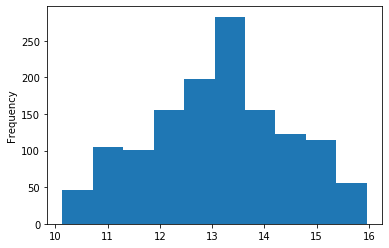

In [93]:
#Transformación de variables:
df['log_expenses'] = np.log2(df['expenses'] + 1)
plt.figure(1)
df['expenses'].plot(kind = 'hist')
plt.figure(2)
df['log_expenses'].plot(kind = 'hist')

In [94]:
# variables cualitativas y cuantitativas:
num_list = df[['age', 'bmi', 'expenses', 'children']]
cat_list = df[['sex', 'smoker', 'region']]

## Codificación de variables categóricas:

Otro requisito de los algoritmos de aprendizaje automático es codificar variables categóricas en números. Dos métodos comunes son la codificación one-hot y la codificación de etiquetas.

In [95]:
# One hot encoding:
one_hot_data = pd.get_dummies(cat_list)

In [96]:
one_hot_data.tail(5)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1
1337,1,0,0,1,0,1,0,0


In [97]:
# Label encoding:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

for i in cat_list:
    df[i] = LabelEncoder().fit_transform(df[i])

In [98]:
df.tail(5)

,age,sex,bmi,children,smoker,region,expenses,log_expenses
1333,50,1,31.0,3,0,1,10600.55,13.371988
1334,18,0,31.9,0,0,0,2205.98,11.107858
1335,18,0,36.9,0,0,2,1629.83,10.671391
1336,21,0,25.8,0,0,3,2007.95,10.972226
1337,61,0,29.1,0,1,1,29141.36,14.830830


## Análisis de correlación:

El análisis de correlación examina la correlación lineal entre pares de variables.

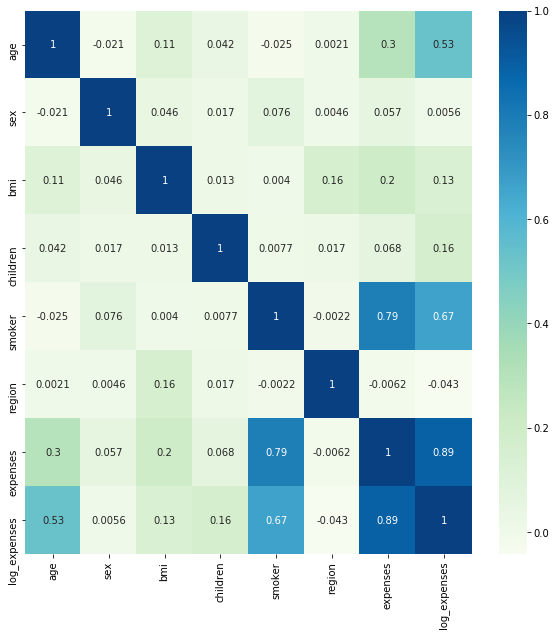

In [50]:
plt.figure(column, figsize = (10,10))
correlation = df.corr()
sns.heatmap(correlation, cmap='GnBu', annot = True)

## Generación del modelo

Después de todos los cálculos, también puede realizar un análisis quizás más estadístico de sus datos financieros, con un análisis de regresión más tradicional, como la Regresión de mínimos cuadrados ordinarios (OLS).

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = df.drop(['expenses', 'log_expenses'], axis=1)
y = df['log_expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
coef = model.coef_
intercept = model.intercept_

In [75]:
intercept

10.256092924705147

In [76]:
coef

array([ 0.04862702, -0.13061304,  0.01770854,  0.13782689,  2.24146556,
       -0.07341217])

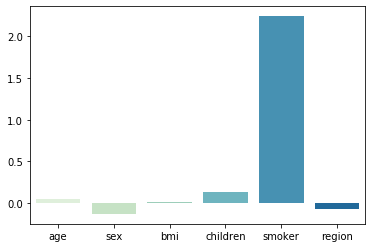

In [77]:
sns.barplot(x = X_train.columns, y = coef, palette = "GnBu")

In [78]:
# Transformar las predicciones de gastos a su escala original

expenses_pred = 2 ** y_pred

In [79]:
expenses_pred

array([ 3114.17526996, 10672.62246837,  8424.86362972, 12023.80605953,
        2815.42743096, 28997.1906889 , 10093.25427599, 11470.7373343 ,
        3818.60931775, 25135.51313057, 11274.29214072, 13915.04902587,
        6759.72638579,  6791.74228208,  2823.2004327 ,  8479.6689517 ,
        4266.22216871,  6390.92707234, 13896.67022705, 12753.94055133,
        9700.07059534, 30902.36265043,  7696.8394118 ,  7169.42521337,
        3245.90819759,  6592.11247579,  8872.57151035,  8381.8916221 ,
        5787.85476618,  4199.08246149, 11834.92059824,  5086.10869152,
       60661.11522594, 14089.66055232, 48207.27127218,  8537.61561848,
       19224.13669562, 18487.89711889, 12607.89606169, 40071.80231395,
        5151.80015886, 11438.48922248, 11162.6958215 , 12153.22462723,
        4826.86080131, 11990.17882176,  3359.7413591 , 18091.67743022,
        8097.06601981, 17428.33080772, 11621.38080045, 11681.51809709,
        3188.82392952,  8735.42780979, 14923.23632661,  5587.74675204,
      

In [80]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R Squared:', round(model.score(X_test, y_test), 2))

MAE: 0.39438423305346226
MSE: 0.3733630810004379
RMSE: 0.6280001855520922
R Squared: 0.79



### Regresión lineal con método OLS utilizando statsmodels

Para hacer esto, debe hacer uso de la biblioteca `statsmodels`, que no solo le proporciona las clases y funciones para estimar muchos modelos estadísticos diferentes, sino que también le permite realizar pruebas estadísticas y realizar una exploración de datos estadísticos.

In [72]:
# Importar el modelo de la api de statsmodels bajo el alias 'sm'
import statsmodels.api as sm

# Construir el modelo
model = sm.OLS(y_train, X_train).fit()

# Desplegar los resultados
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           log_expenses   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.077e+04
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:33:46   Log-Likelihood:                         -2739.9
No. Observations:                1338   AIC:                                      5492.
Df Residuals:                    1332   BIC:                                      5523.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Explicación del modelo:

Los aspectos a tener en cuenta al estudiar el resultado del resumen del modelo son los siguientes:

1. El dep. Variable, que indica qué variable es la respuesta en el modelo.
2. El modelo, en este caso, es OLS. Es el modelo que estás usando en el ajuste.
3. Además, también tiene el Método para indicar cómo se calcularon los parámetros del modelo. En este caso, verá que esto se establece en Mínimos cuadrados.
4. El número de observaciones (No. Observaciones). Tenga en cuenta que también puede derivar esto con el paquete Pandas utilizando la función info (). Ejecute return_data.info () en la consola IPython del fragmento DataCamp Light anterior para confirmar esto.
5. El grado de libertad de los residuos (Residuos del DF).
6. El número de parámetros en el modelo, indicado por el Modelo DF; Tenga en cuenta que el número no incluye el término constante X que se definió en el código anterior.

Esto fue básicamente toda la columna izquierda que revisaste. La columna de la derecha le brinda más información sobre la bondad del ajuste. Ves, por ejemplo:

1. R cuadrado, que es el coeficiente de determinación. Este puntaje indica qué tan bien la línea de regresión se aproxima a los puntos de datos reales. En este caso, el resultado es 0.280. En porcentajes, esto significa que la puntuación es del 28%. Cuando el puntaje es 0%, indica que el modelo no explica la variabilidad de los datos de respuesta en torno a su media. Por supuesto, una puntuación del 100% indica lo contrario.
2. También se ve el Adj. Puntaje R cuadrado, que a primera vista da el mismo número. Sin embargo, el cálculo detrás de esta métrica ajusta el valor R-Cuadrado en función del número de observaciones y los grados de libertad de los residuos (registrados en Residuos DF). El ajuste en este caso no ha tenido mucho efecto, ya que el resultado del puntaje ajustado sigue siendo el mismo que el puntaje R cuadrado normal.
3. La estadística F mide la importancia del ajuste. Se calcula dividiendo el error cuadrático medio del modelo por el error cuadrático medio de los residuos. La estadística F para este modelo es 514.2.
4. A continuación, también está el Prob (estadística F), que indica la probabilidad de que obtenga el resultado de la estadística F, dada la hipótesis nula de que no están relacionados.
5. El Log-verosimilitud indica el log de la función de verosimilitud, que es, en este caso, 3513.2.
6. El AIC es el criterio de información de Akaike: esta métrica ajusta la probabilidad de registro en función del número de observaciones y la complejidad del modelo. El AIC de este modelo es -7022.
7. Por último, el BIC o el Criterio de Información Bayesiano, es similar al AIC que acaba de ver, pero penaliza los modelos con más parámetros con mayor severidad. Dado que este modelo solo tiene un parámetro (marque el Modelo DF), el puntaje BIC será el mismo que el puntaje AIC.

Debajo de la primera parte del resumen del modelo, verá informes para cada uno de los coeficientes del modelo:

1. El valor estimado del coeficiente se registra en coef.
2. std err es el error estándar de la estimación del coeficiente.
3. También está el valor de estadística t, que encontrará debajo de t. Esta métrica se usa para medir cuán estadísticamente significativo es un coeficiente.
4. P> | t | indica la hipótesis nula de que el coeficiente = 0 es verdadero. Si es inferior al nivel de confianza, a menudo 0.05, indica que existe una relación estadísticamente significativa entre el término y la respuesta. En este caso, verá que la constante tiene un valor de 0.198, mientras que AAPL se establece en 0.000.

Por último, hay una parte final del resumen del modelo en la que verá otras pruebas estadísticas para evaluar la distribución de los residuos:

1. Omnibus, que es la prueba de Omnibus D'Angostino: proporciona una prueba estadística combinada para detectar la asimetría y la curtosis.
2. El Prob (Omnibus) es la métrica Omnibus convertida en una probabilidad.
3. A continuación, la inclinación o inclinación mide la simetría de los datos sobre la media.
4. La curtosis da una indicación de la forma de la distribución, ya que compara la cantidad de datos cercanos a la media con los que están lejos de la media (en las colas).
5. Durbin-Watson es una prueba de presencia de autocorrelación, y Jarque-Bera es otra prueba de asimetría y curtosis. También puede convertir el resultado de esta prueba en una probabilidad, como puede ver en Prob (JB).
6. Por último, tienes el Cond. No, lo que prueba la multicolinealidad.

## 2 - Regresión logística

La regresión logística se usa comúnmente para estimar la probabilidad de que una instancia pertenezca a una clase en particular. Si la probabilidad estimada de que una instancia sea superior al 50%, el modelo predice que la instancia pertenece a esa clase (1) o, de lo contrario, predice que no (0). Esto lo convierte en un clasificador binario. En este cuaderno veremos la teoría detrás de la regresión logística y la usaremos para indicar si un usuario de Internet en particular hizo clic en un anuncio. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio en función de las características de ese usuario.

### Se leen los datos para construir el modelo:

In [2]:
# Leer los datos dentro de un dataframe de pandas:
data = pd.read_csv('advertising.csv')

In [3]:
data.info() # Revisar la información del dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
data.tail() #visualizar la cola del dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [5]:
data.describe() # Estadística descriptiva del dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Análisis exploratorio:

Text(0.5, 0, 'Age')

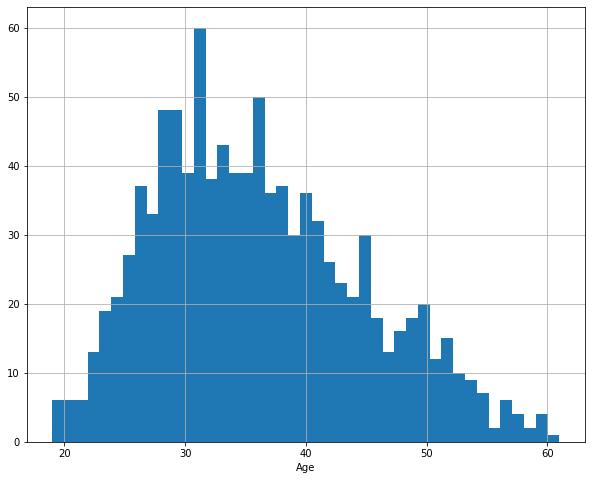

In [6]:
# histograma de edades:

plt.figure(figsize = (10, 8))
data.Age.hist(bins = data.Age.nunique())
plt.xlabel('Age')

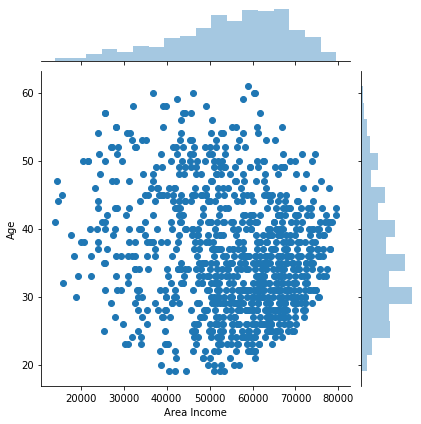

In [7]:
# Ver ingreso por área según edad:

sns.jointplot(data["Area Income"], data.Age)

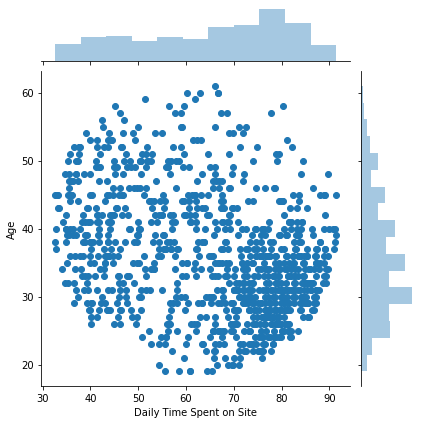

In [8]:
# Visualizar el tiempo que pasa en el sitio según edad:

sns.jointplot(data["Daily Time Spent on Site"], data.Age)

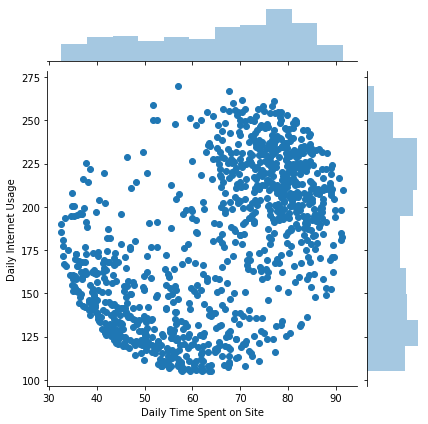

In [9]:
# Visualizar el tiempo que pasa en el sitio en relación al uso total diario de Internet:

sns.jointplot(data["Daily Time Spent on Site"], data["Daily Internet Usage"])

/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


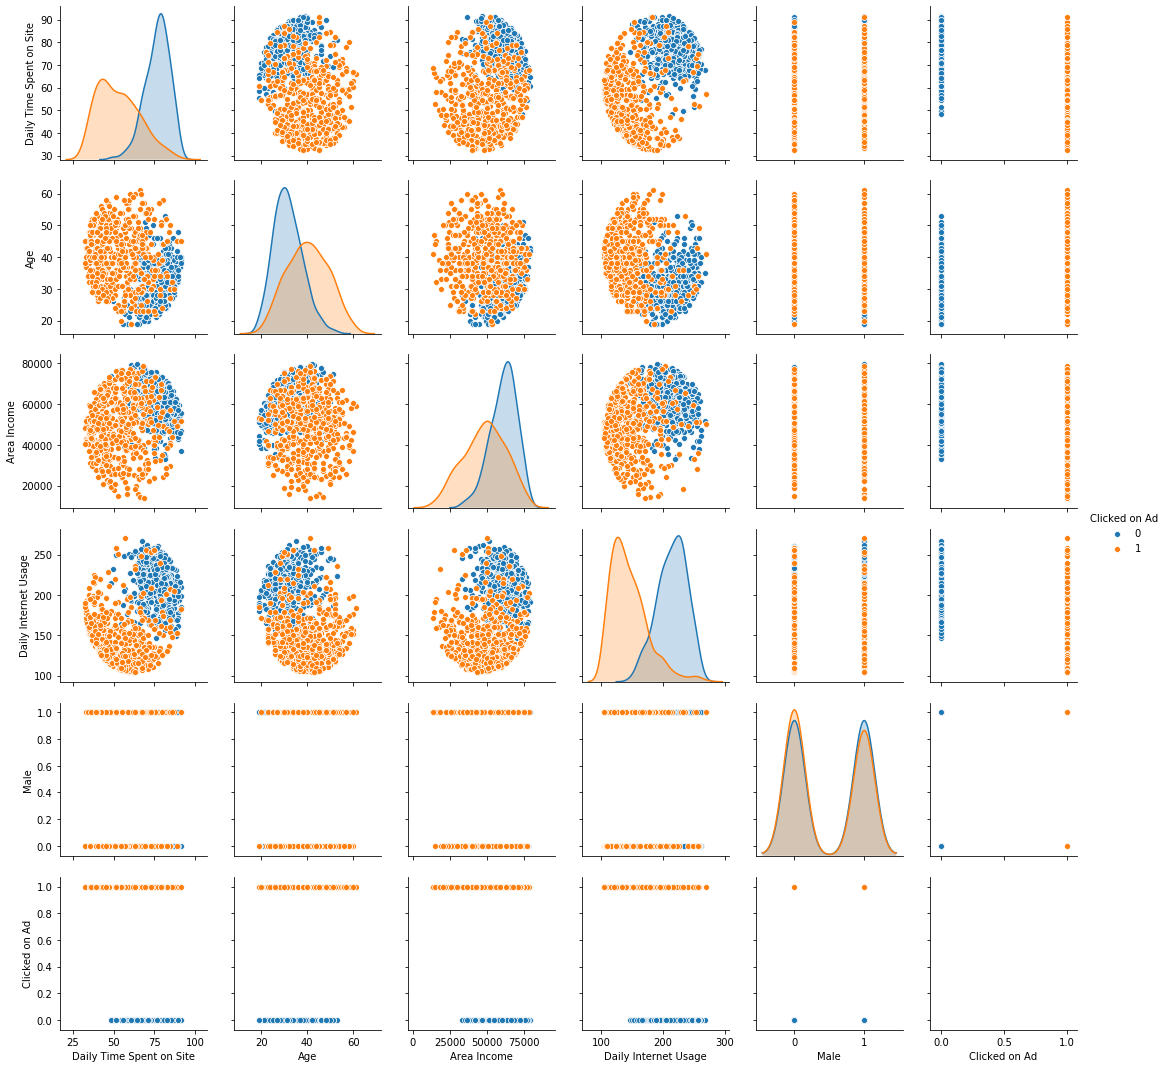

In [19]:
# Visualizar las variables según dos clases: si hizo clic o no en la publicidad:

sns.pairplot(data, hue='Clicked on Ad')

In [10]:
# Contar incidencias de la variable dependiente:
data['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

Como se puede ver, el dataset está balanceado

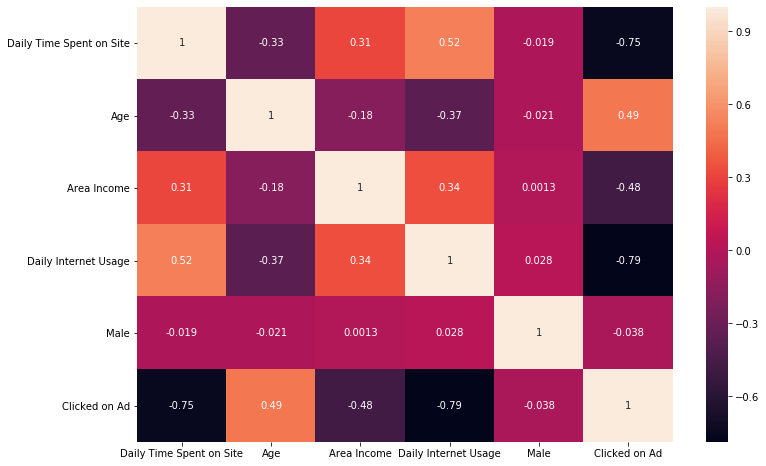

In [11]:
# Graficar el mapa de calor:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True)

### Explicación teórica de la regresión logística

La regresión logística es el algoritmo de clasificación lineal de referencia para problemas de dos clases. Es fácil de implementar, fácil de entender y obtiene excelentes resultados en una amplia variedad de problemas, incluso cuando se violan las expectativas que el método tiene para sus datos.

La función logística, también llamada función sigmoidea, fue desarrollada por los estadísticos para describir las propiedades del crecimiento de la población en ecología, aumentando rápidamente y alcanzando el máximo de la capacidad de carga del medio ambiente. Es una curva en forma de S que puede tomar cualquier número de valor real y asignarlo a un valor entre 0 y 1, pero nunca exactamente en esos límites.

$$\frac{1}{1 + e^{-x}}$$

$e$ es la base de los logaritmos naturales y x es el valor que desea transformar mediante la función logística.

Text(0.5, 1.0, 'Sigmoid Function')

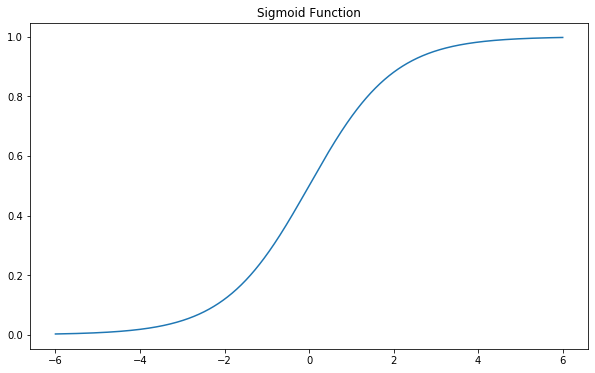

In [12]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.title("Sigmoid Function")

La ecuación de regresión logística tiene una representación muy similar a la regresión lineal. La diferencia es que el valor de salida que se modela es de naturaleza binaria.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

o

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ es el término intercepto

$\beta_1$ es el coeficiente para $x_1$

$\hat{y}$ es la salida prevista con un valor real entre 0 y 1. Para convertir esto en una salida binaria de 0 o 1, esto debería redondearse a un valor entero o se debería proporcionar un punto de corte para especificar el punto de segregación de clases.

### Aprendiendo el modelo de regresión logística

Los coeficientes (valores Beta b) del algoritmo de regresión logística deben estimarse a partir de sus datos de entrenamiento. Esto se hace usando [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

La estimación de máxima verosimilitud es un algoritmo de aprendizaje común utilizado por una variedad de algoritmos de aprendizaje automático, aunque hace suposiciones sobre la distribución de sus datos (más sobre esto cuando hablemos de preparar sus datos).

Los mejores coeficientes darían como resultado un modelo que predeciría un valor muy cercano a 1 (por ejemplo, masculino) para la clase predeterminada y un valor muy cercano a 0 (por ejemplo, femenino) para la otra clase. La intuición de la máxima verosimilitud para la regresión logística es que un procedimiento de búsqueda busca valores para los coeficientes (valores Beta) que minimizan el error en las probabilidades predichas por el modelo a las de los datos (por ejemplo, probabilidad de 1 si los datos son los principales clase).

No vamos a entrar en las matemáticas de la máxima probabilidad. Basta decir que se utiliza un algoritmo de minimización para optimizar los mejores valores para los coeficientes de sus datos de entrenamiento. Esto a menudo se implementa en la práctica utilizando un algoritmo de optimización numérica eficiente (como el método Quasi-newton).

Cuando esté aprendiendo logística, puede implementarlo usted mismo desde cero utilizando el algoritmo de descenso de gradiente mucho más simple.

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

### Preparar datos para regresión logística
Las suposiciones hechas por la regresión logística sobre la distribución y las relaciones en sus datos son muy parecidas a las suposiciones hechas en la regresión lineal.

Se han realizado muchos estudios para definir estos supuestos y se utiliza un lenguaje estadístico y probabilístico preciso. Mi consejo es utilizarlos como pautas o reglas generales y experimentar con diferentes esquemas de preparación de datos.

En última instancia, en los proyectos de aprendizaje automático de modelado predictivo, usted está muy centrado en hacer predicciones precisas en lugar de interpretar los resultados. Como tal, puede romper algunas suposiciones siempre que el modelo sea sólido y funcione bien.

- **Variable de salida binaria:** Esto puede ser obvio como ya lo hemos mencionado, pero la regresión logística está pensada para problemas de clasificación binaria (dos clases). Predecirá la probabilidad de que una instancia pertenezca a la clase predeterminada, que se puede encajar en una clasificación 0 o 1.
- **Eliminar ruido:** La regresión logística asume que no hay error en la variable de salida (y), considere eliminar valores atípicos y posiblemente instancias mal clasificadas de sus datos de entrenamiento.
- **Distribución gaussiana:** La regresión logística es un algoritmo lineal (con una transformación no lineal en la salida). Supone una relación lineal entre las variables de entrada y la salida. Las transformaciones de datos de sus variables de entrada que exponen mejor esta relación lineal pueden resultar en un modelo más preciso. Por ejemplo, puede usar log, root, Box-Cox y otras transformadas univariadas para exponer mejor esta relación.
- **Eliminar entradas correlacionadas:** Al igual que la regresión lineal, el modelo puede sobreajustarse si tiene varias entradas altamente correlacionadas. Considere calcular las correlaciones por pares entre todas las entradas y eliminar las entradas altamente correlacionadas.
- **No converger:** Es posible que el proceso de estimación de probabilidad esperada que aprende los coeficientes no converja. Esto puede suceder si hay muchas entradas altamente correlacionadas en sus datos o si los datos son muy escasos (por ejemplo, muchos ceros en sus datos de entrada).

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.973427    0.972263  0.972857    0.972845      0.972851
precision    0.963989    0.982301  0.972857    0.973145      0.973040
recall       0.983051    0.962428  0.972857    0.972739      0.972857
support    354.000000  346.000000  0.972857  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[348   6]
 [ 13 333]]

Test Result:
Accuracy Score: 96.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.963455    0.963211  0.963333    0.963333      0.963330
precision    0.935484    0.993103  0.963333    0.964294      0.965062
recall       0.993151    0.935065  0.963333    0.964108      0.963333
support    146.000000  154.000000  0.963333  300.000000    300.

### Medición de desempeño del modelo:

#### 1. Matriz de confusión
- Cada fila: clase real
- Cada columna: clase prevista

Primera fila: anuncios sin clics, la clase negativa:
* 143 se clasificaron correctamente como anuncios sin clics. **Verdaderos negativos**.
* Los 6 restantes se clasificaron erróneamente como anuncios en los que se hizo clic. **Falso positivo**


Segunda fila: los anuncios en los que se hizo clic, la clase positiva:
* 3 se clasificaron incorrectamente como anuncios sin clics. **Falsos negativos**
* 146 fueron anuncios clicados correctamente clasificados. **Verdaderos positivos**

#### 2. Precision

**Precision** mide la precisión de las predicciones positivas. También llamada `precisión` del clasificador ==> `98.01%`

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

#### 3. Recall

`Recall` se utiliza normalmente con "recuperación" ("Sensibilidad" o "Tasa de verdaderos positivos"). La proporción de instancias positivas que el clasificador detecta correctamente.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$ ==> `96.10%`

#### 4. F1 Score

$F_1$ score es la media armónica de precisión y recuerdo. La media regular da el mismo peso a todos los valores. La media armónica da más peso a los valores bajos. 

$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$ ==> `97.05%`

El $F_1$ score favorece a los clasificadores que tienen una precisión y un recuerdo similares.

#### 5. Precision / Recall Tradeoff

Aumento de la precisión, reducción de recall y viceversa

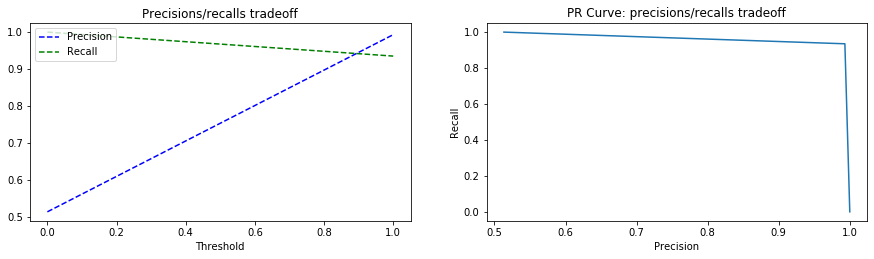

In [16]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

Con este gráfico, puede seleccionar el valor umbral que le brinde la mejor compensación de precisión / recuperación para su tarea.

Algunas tareas pueden requerir una mayor precisión (precisión de predicciones positivas). Como diseñar un clasificador que recoja contenidos de adultos para proteger a los niños. Esto requerirá que el clasificador establezca un listón alto para permitir que los niños consuman cualquier contenido.

Algunas tareas pueden requerir una mayor recuperación (proporción de instancias positivas que son detectadas correctamente por el clasificador). Como detectar ladrones / intrusos en imágenes de vigilancia: cualquier cosa que se parezca remotamente a instancias "positivas" para ser detectadas.

### La curva ROC (Receiver Characteristics Curve)

En lugar de representar `precision` frente a `recall`, la curva ROC representa la "tasa de verdaderos positivos" (otro nombre para `recall`) frente a la "tasa de falsos positivos". La "tasa de falsos positivos" (FPR) es la proporción de casos negativos que se clasifican incorrectamente como positivos. Es igual a uno menos la "tasa negativa verdadera", que es la proporción de instancias negativas que se clasifican correctamente como negativas.

El TNR también se llama "especificidad". Por lo tanto, la curva ROC representa la "sensibilidad" (recall) frente a `1 - especificidad`.

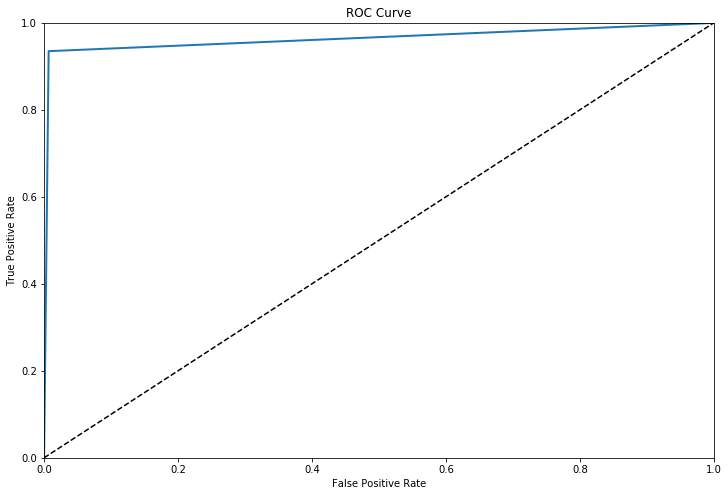

In [17]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize = (12, 8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_clf.predict(X_test))

0.9641078099982208

Utilice la curva PR siempre que la **clase positiva sea rara** o cuando le interesen más los falsos positivos que los falsos negativos

Utilice la curva ROC siempre que la **clase negativa sea rara** o cuando le interesen más los falsos negativos que los falsos positivos


En el ejemplo anterior, la curva ROC parecía sugerir que el clasificador es bueno. Sin embargo, cuando observa la curva PR, puede ver que hay margen de mejora.

## 3 - Red Neuronal



In [2]:
# Se necesitará la biblioteca Keras para IA
import keras

Using TensorFlow backend.


In [3]:
# Leer el archivo de tarjetas:

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# Normalizar la variable Amount:

from sklearn.preprocessing import StandardScaler
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.iloc[:,[29, 31]].head()

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403


In [6]:
# Quitar las columnas Amount y Time, ya que no son necesarias:

df = df.drop(columns = ['Amount', 'Time'], axis = 1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount(Normalized)'],
      dtype='object')

In [7]:
# Preprocesar Datos y asignar las variables:

X = df.drop('Class', axis = 1)
y = df['Class']

In [8]:
# Crear subconjuntos de entrenamiento y prueba:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transformar los datos a arreglo numpy para implementación con keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
# Crear la red neuronal:

from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(units = 20, input_dim = X_train.shape[1], activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dropout(0.5),
    Dense(units = 20,activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 2,133
Trainable params: 2,133
Non-

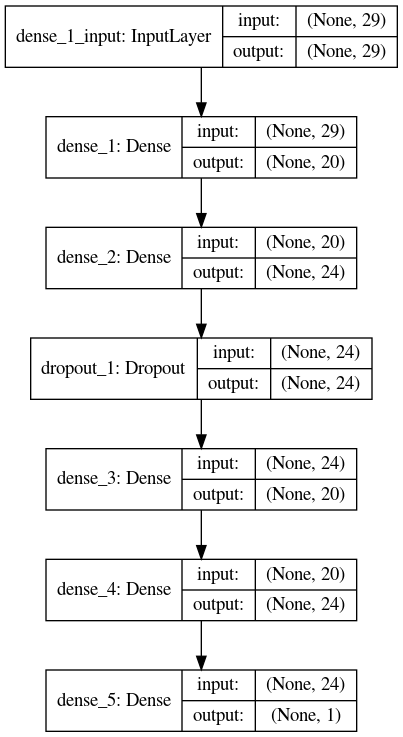

In [10]:
# Ver diagrama del modelo:

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True, expand_nested = True)

In [11]:
# Entrenar el modelo:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 30, epochs = 5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 24s 119us/step - loss: 0.0107 - accuracy: 0.9984
Epoch 2/5
199364/199364 [==============================] - 23s 115us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 22s 111us/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 23s 113us/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
199364/199364 [==============================] - 24s 119us/step - loss: 0.0034 - accuracy: 0.9994


In [12]:
# Estimar la precisión del modelo:

score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1] * 100, score[0]))

85443/85443 [==============================] - 3s 36us/step
Test Accuracy: 99.94%
Test Loss: 0.0028004485751415855


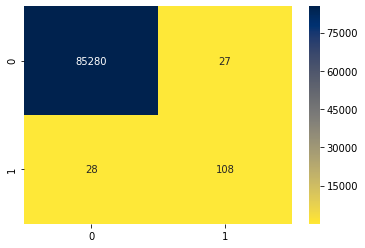

In [13]:
# Matríz de confusión del modelo:

from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt = '.0f', cmap = 'cividis_r')
plt.show()

In [14]:
# Se calcula la precisión del nuevo modelo:
scoreNew = model.evaluate(X, y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

284807/284807 [==============================] - 9s 31us/step
Test Accuracy: 99.94%
Test Loss: 0.0028468082627830017


In [15]:
# Reporte de clasificación del modelo:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.79      0.80       136

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Entrenar y calcular los datos de la curva ROC:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el área bajo la curva: AUC
auc_score = roc_auc_score(y_test, y_pred)

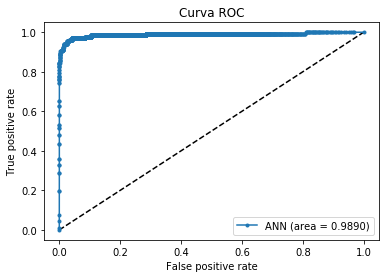

In [17]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ANN (area = {:.4f})'.format(auc_score))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import precision_recall_curve, f1_score, auc

# Entrenar y calcular Precision-Recall Curve:
#y_pred = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calcular el AUC del precision-recall

auc_score = auc(recall, precision)

auc_score

0.8120502613950235

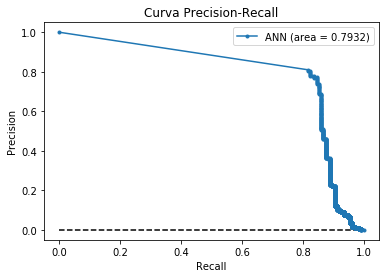

In [45]:
plt.figure(2)
plt.plot([0, 1], [0, 0], 'k--')
plt.plot(recall, precision, marker = '.', label='ANN (area = {:.4f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc = 'best')
plt.show()